<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from error_analysis_funs import *

methods = ['qeep-sparse', 'pencil']

phases = [4.77144,    2.82579877, 4.88021636, 0.41070768, 3.06350016]
num_phases = len(phases)

final_error = 0.1
confidence_alpha = 0.8
confidence_beta = 0.1
epsilons = [0.3]

cutoff = 1/ num_phases / 3

amplitudes = np.ones(num_phases)/num_phases

estimates = {}
costs = {}
for method in methods:
    estimates[method] = {}
    costs[method] = {}

for method in methods:
    for eps in epsilons:
        
        print(method, eps)
        e,c  = multiorder_estimation(method,
                             phases, amplitudes,
                             eps, confidence_alpha, confidence_beta,
                             final_error, cutoff)
        estimates[method][eps] = e
        costs[method][eps] = c

qeep-sparse 0.3
Printing possible matchings:
New phase: 3.2911923037607353, old_phases: [(2.974349819373355, 1.0, 1.031367733366429), (3.891469610623833, 2.0, 1.031367733366429)]

Printing possible matchings:
New phase: 3.5903916041026203, old_phases: [(2.974349819373355, 1.0, 1.031367733366429), (4.002964833434792, 1.0, 1.031367733366429), (3.891469610623833, 2.0, 1.031367733366429)]

Printing possible matchings:
New phase: 3.889590904444505, old_phases: [(4.002964833434792, 1.0, 1.031367733366429), (3.891469610623833, 2.0, 1.031367733366429)]

Printing possible matchings:
New phase: 4.1887902047863905, old_phases: [(4.002964833434792, 1.0, 1.031367733366429), (3.891469610623833, 2.0, 1.031367733366429)]

Couldnt find good beta, exiting
pencil 0.3
Couldnt find good beta, exiting


C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:50: UserWarning: Alias detected, matching possibly ambiguous,taking closest signal. Did you choose the correct multiplier?
  warnings.warn('Alias detected, matching possibly ambiguous,'
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:50: UserWarning: Alias detected, matching possibly ambiguous,taking closest signal. Did you choose the correct multiplier?
  warnings.warn('Alias detected, matching possibly ambiguous,'
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:50: UserWarning: Alias detected, matching possibly ambiguous,taking closest signal. Did you choose the correct multiplier?
  warnings.warn('Alias detected, matching possibly ambiguous,'
C:\Users\Repair\Documents\new_qpe_alg\qpe\sparse_qpe.py:50: UserWarning: Alias detected, matching possibly ambiguous,taking closest signal. Did you choose the correct multiplier?
  warnings.warn('Alias detected, matching possibly ambiguous,'
C:\Users\Repair\Documents\new_qp

<>:9: DeprecationWarning: invalid escape sequence \e
<ipython-input-2-3aff95c63445>:9: DeprecationWarning: invalid escape sequence \e
  plt.title(f'$\epsilon = {eps}$')


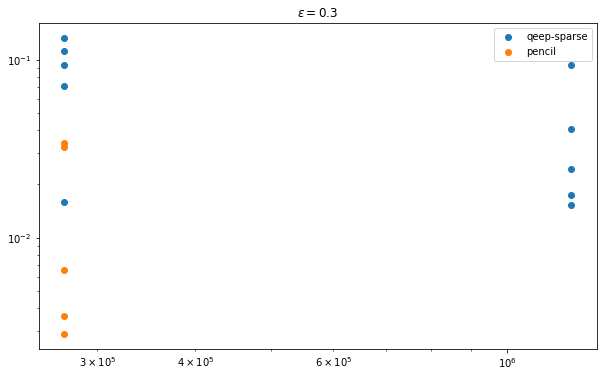

In [2]:
plt.figure(figsize = (10, 6))
for i,eps in enumerate(epsilons):
    plt.subplot(1,len(epsilons),i+1)
    for method in methods:
        estimation_errors = get_estimation_errors(estimates[method][eps], phases)
        plt.scatter([c for c_vec in costs[method][eps] for c in c_vec ], [e for e_vec in estimation_errors for e in e_vec ], label = method)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'$\epsilon = {eps}$')
    plt.legend()
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<ipython-input-3-b41ef9093306>:8: DeprecationWarning: invalid escape sequence \e
  plt.title(method+f', $\epsilon$ = {eps}')


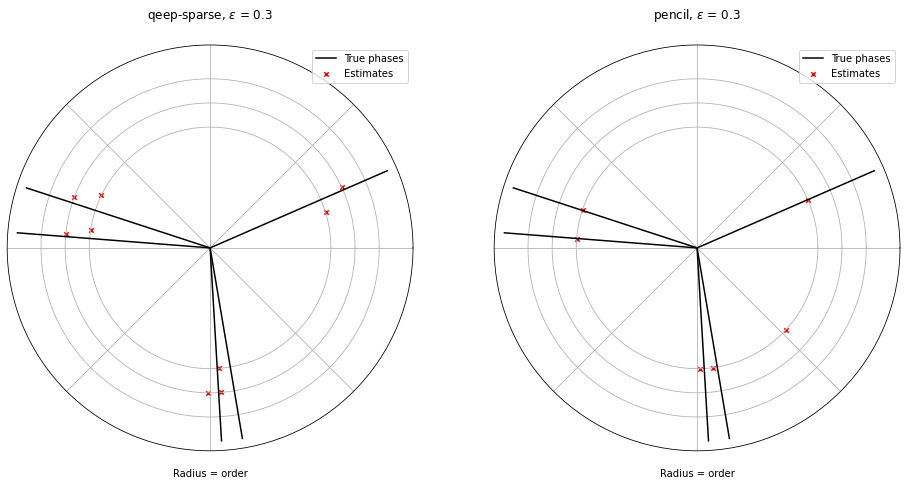

In [3]:
plt.figure(figsize = (16, 12))
i = 0
for eps in epsilons:
    for method in methods:
        i+=1
        plt.subplot(len(epsilons), len(methods), i, projection='polar')
        plot_phase_estimates(phases, estimates[method][eps], np.ceil(np.log2(2*eps/final_error)).astype('int'))
        plt.title(method+f', $\epsilon$ = {eps}')
plt.show()

In [4]:
 phase_differences = [
        abs(phase1 - phase2) for j, phase1 in enumerate(phases)
        for phase2 in phases[j + 1:]
     if abs(phase1 - phase2) > 0.5
    ]
print(phase_differences)
print(len(phase_differences))

[1.94564123, 4.36073232, 1.7079398400000003, 2.0544175900000003, 2.4150910899999998, 4.469508680000001, 1.8167162000000006, 2.6527924799999996]
8


In [5]:
np.pi-2*eps

2.541592653589793